In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
import seaborn as sns
from seaborn import palplot
import pandas as pd

# Data Collection and Cleaning

## Section 1 : Socio Economic Indicators 

Data Source: http://www.devdatalab.org/covid

Path: https://www.dropbox.com/sh/y949ncp39towulf/AAADOq6icGOYL56UZ0a1kc4Ba/nfhs?dl=0&subfolder_nav_tracking=1

Variables of Interest

|   Variable Name                   |             Definition                                      |
|-----------------------------------|-------------------------------------------------------------|
|pc11_district_id                   |Unique District ID Census 2011                               |
|pc11_district_name                 |District name in census 2011                                 |
|pc11_state_id                      |State ID in census 2011                                      |
|pc11_state_name                    |State name in census 2011                                    |
|richest                            |Richest 20% in 2016                                          |
|poorest                            |Poorest 20% in 2016                                          |
|water_dwelling                     |% housedholds with water access within dwelling in 2016      |
|water_fetch_women                  |% households where women fetch water from outside in 2016    | 
|hand_wash_water                    |% households with hand washing arrangement in 2016           |
|hand_wash_soap                     |% households handwashing with soap in 2016                   |
|no_toilet                          |% households who practiced open defecation in 2016           |
|firewood                           |% households who used firewood for fuel in 2016              |
|num_rooms                          |Average number of rooms in 2016                              |
|mem_per_room                       |Average number of members per room                           |
|dum_65p                            |% households with a 65+ member                               |

In [2]:
#Loading up the data
nfhs_dta_path = 'data/Indicators/ddl_nfhs_2011.dta'
nfhs_df= pd.read_stata(nfhs_dta_path)

# Dropping columns with variables connected only with the women and district and state names
nfhs_df=nfhs_df.drop(['pc11_district_name', 'ex_diab_broad_ind_fem', 'ex_htn_broad_ind_fem', 'bmigrt27_5_fem', 'csmoke_fem'], axis=1)

nfhs_df.head()                     

,pc11_district_id,pc11_state_id,pc11_state_name,richest,poorest,water_dwelling,water_fetch_women,hand_wash_water,hand_wash_soap,no_toilet,firewood,num_rooms,mem_per_room,dum_65p
0,001,1,Jammu & Kashmir,8.311805,8.311969,7.057642,94.276848,96.740593,79.543213,0.826517,50.830387,2.346276,2.950212,34.456902
1,002,1,Jammu & Kashmir,13.833916,1.934850,5.946562,93.986191,97.964149,89.273155,0.509206,36.995975,2.627664,2.467012,34.934296
2,003,1,Jammu & Kashmir,6.757979,3.378412,6.472993,82.190422,76.990524,61.748947,1.690710,9.061338,2.088325,2.106857,29.558363
3,004,1,Jammu & Kashmir,3.752654,18.584255,2.996613,87.871864,50.327682,41.393616,0.834409,36.651791,2.346389,2.533801,26.990757
4,005,1,Jammu & Kashmir,16.886778,11.014970,2.295900,94.575592,77.891991,58.317440,38.312347,77.006042,2.319419,2.831645,22.103603


### Subsetting

In [3]:
#Taking only a limited set of indicators for ease of merging, this can always be changed later.
req_indicators_socio = ['pc11_district_id','pc11_state_id','richest','poorest','no_toilet']

nfhs_df_subset = nfhs_df.loc[:,req_indicators_socio]

## Section 2 : Health Infrastructure


|   Variable Name                   |             Definition                                                         |
|-----------------------------------|--------------------------------------------------------------------------------|
|pc11_district_id                   |2011 Census District ID                                                         |
|pc11_district_name                 |2011 Census District name                                                       |
|pc11_state_id                      |2011 Census State ID                                                            |
|pc11_state_name                    |2011 Census State Name                                                          |
|count_2011_sub                     |Number of sub-centres in the district in 2016                                   |
|count_2011_dish                    |Number of district hospitals in the district in 2016                            |
|count_2011_sth                     |Number of sub-district/taluk hospitals in the district in 2016                  |
|count_2011_phc                     |Number of primary health centers in the district in 2016                        |
|count_2011_chc                     |Number of community health centers in the district in 2016                      | 
|pr_2011_phc                        |Number of primary health centers per 10000 people in the district in 2016       |
|pr_2011_chc                        |Number of community health centers per 10000 people in the district in 2016     |
|pr_2011_sub                        |Number of sub-centres per 10000 people in the district in 2016                  |
|pr_2011_dish                       |Number of district hospitals per 10000 people in the district in 2016           |
|pr_2011_sth                        |Number of sub-district/taluk hospitals per 10000 people in the district in 2016 |


In [4]:
# Data file paths
health_infra_dta_path = 'data/Hospital/ddl_health_infra_2011.dta'

# Read dta file
health_infra_df = pd.read_stata(health_infra_dta_path)

# Droping the count columns and district and state names columns
health_infra_df = health_infra_df.drop([ 'pc11_district_name','count_2011_sub','pr_2011_sub','count_2011_dish', 
                                      'count_2011_sth', 'count_2011_phc', 'count_2011_chc'], axis=1)

# renaming columns
health_infra_df = health_infra_df.rename(columns={'pr_2011_phc' : 'primary_health_centers',
                                                'pr_2011_chc' : 'community_health_centers',
                                                'pr_2011_dish': 'district_hospitals',
                                                'pr_2011_sth' : 'sub_taluk_hospitals'
                                               })
health_infra_df.head()

,pc11_district_id,pc11_state_id,pc11_state_name,primary_health_centers,community_health_centers,district_hospitals,sub_taluk_hospitals
0,001,1,Jammu & Kashmir,0.344717,0.064634,0.010772,0.0
1,002,1,Jammu & Kashmir,0.696582,0.099512,0.012439,0.0
2,003,1,Jammu & Kashmir,1.053564,0.210713,0.070238,0.0
3,004,1,Jammu & Kashmir,1.065417,0.266354,0.066589,0.0
4,005,1,Jammu & Kashmir,0.668528,0.078650,0.019663,0.0


### Subsetting 

In [5]:
#Taking only a limited set of indicators for ease of merging, this can always be changed later.
req_indicators_health = ['pc11_district_id','primary_health_centers','pc11_state_name']

health_infra_df_subset = health_infra_df.loc[:,req_indicators_health]

health_infra_df_subset

,pc11_district_id,primary_health_centers,pc11_state_name
0,001,0.344717,Jammu & Kashmir
1,002,0.696582,Jammu & Kashmir
2,003,1.053564,Jammu & Kashmir
3,004,1.065417,Jammu & Kashmir
4,005,0.668528,Jammu & Kashmir
...,...,...,...
635,636,0.448432,Puducherry
636,637,0.468271,Puducherry
637,638,1.272434,Andaman & Nicobar Island
638,639,0.621520,Andaman & Nicobar Island


## Section 3 : Pollution


|   Variable Name                   |             Definition                                      |
|-----------------------------------|-------------------------------------------------------------|
|pc11_district_id                   |Unique District ID Census 2011                               |
|pc11_district_name                 |District name in census 2011                                 |
|pc11_state_id                      |State ID in census 2011                                      |
|pc11_state_name                    |State name in census 2011                                    |
|mean_pollution                     |PM2.5 mean in 2016                                           |

In [6]:
# Data file paths
pollution_dta_path = 'data/Indicators/ddl_pollution_sedac_2011.dta'

# Read dta file in
pollution_df= pd.read_stata(pollution_dta_path)

# Dropping columns 
pollution_df=pollution_df.drop(['pc11_district_name'], axis=1)
                               
pollution_df

,pc11_district_id,pc11_state_id,pc11_state_name,mean_pollution
0,001,1,Jammu & Kashmir,29.339097
1,002,1,Jammu & Kashmir,38.904636
2,003,1,Jammu & Kashmir,3.993170
3,004,1,Jammu & Kashmir,8.861835
4,005,1,Jammu & Kashmir,35.535978
...,...,...,...,...
635,636,34,Puducherry,22.700000
636,637,34,Puducherry,24.778195
637,638,35,Andaman & Nicobar Island,4.545310
638,639,35,Andaman & Nicobar Island,11.607143


## Section 4 : Covid Case Counts

In [7]:
deaths_pc11  = pd.read_stata('data/covid_infected_deaths_pc11.dta')
deaths_30_07 = deaths_pc11[deaths_pc11.date == '2020-07-30']
deaths_30_07 = deaths_30_07.drop(columns=['date'])
deaths_30_07.to_csv('data/covid_infected_deaths_30.07.2020.csv')
deaths_30_07.set_index("pc11_state_id", inplace = True)
state_cases_df = deaths_30_07.sum(level='pc11_state_id')

In [8]:
state_cases_df = state_cases_df.reset_index()
state_cases_df = state_cases_df.dropna()

In [9]:
state_cases_df = state_cases_df.drop(index=0)

In [10]:
state_cases_df.head()

,pc11_state_id,total_cases,total_deaths
1,01,21247.0,371.0
2,02,2506.0,13.0
3,03,15456.0,370.0
4,04,1016.0,14.0
5,05,7065.0,76.0


## Section 5: Migration

Background: https://www.ideasforindia.in/topics/macroeconomics/covid-19-expected-migrant-movement-as-lockdown-eases.html

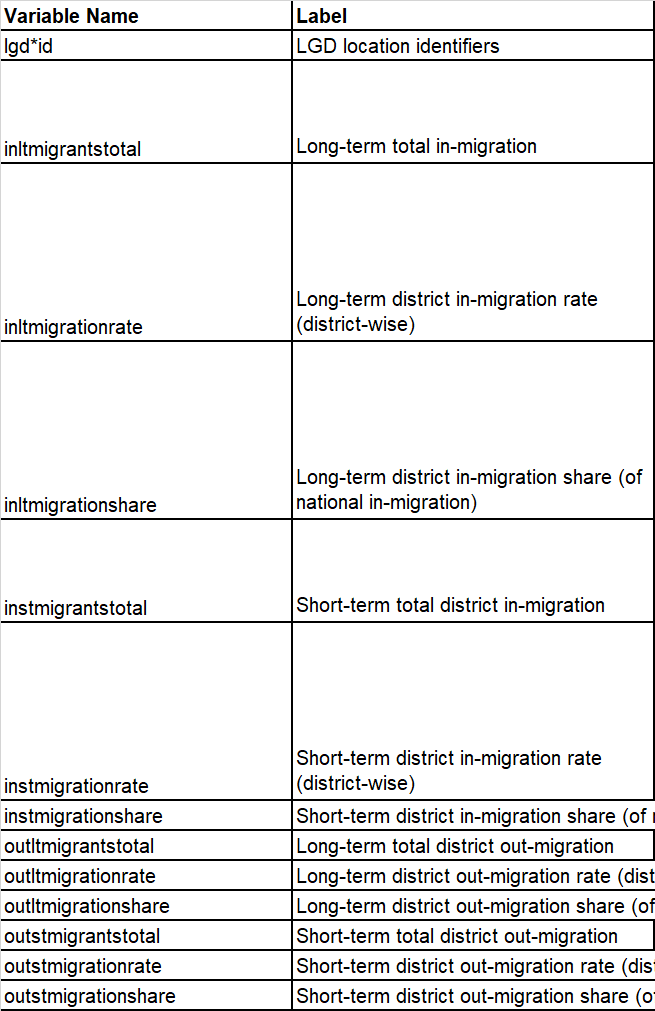

In [11]:
migration_df = pd.read_stata('data/district_migration_pc11.dta')
migration_df

,pc11_state_id,pc11_district_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
0,01,001,8185802.0,0.000751,0.000080,10900000.0,0.001468,0.000118,8185802,0.002328,0.000247,10900000,0.001601,1.283000e-04
1,01,002,8185802.0,0.001551,0.000143,10900000.0,0.001404,0.000097,8185802,0.002037,0.000188,10900000,0.001185,8.220000e-05
2,01,003,8185802.0,0.000427,0.000007,10900000.0,0.006163,0.000076,8185802,0.006820,0.000111,10900000,0.000000,0.000000e+00
3,01,004,8185802.0,0.000433,0.000007,10900000.0,0.005456,0.000071,8185802,0.001697,0.000029,10900000,0.000000,0.000000e+00
4,01,005,8185802.0,0.001091,0.000064,10900000.0,0.000412,0.000018,8185802,0.004508,0.000263,10900000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,34,636,8185802.0,0.038693,0.000198,10900000.0,0.005110,0.000020,8185802,0.021653,0.000111,10900000,0.000253,9.720000e-07
636,34,637,8185802.0,0.011552,0.000283,10900000.0,0.030466,0.000562,8185802,0.011098,0.000271,10900000,0.006689,1.233000e-04
637,35,638,8185802.0,0.042723,0.000192,10900000.0,0.024437,0.000083,8185802,0.064208,0.000289,10900000,0.000000,0.000000e+00
638,35,639,8185802.0,0.033330,0.000430,10900000.0,0.103715,0.001008,8185802,0.011106,0.000143,10900000,0.001146,1.110000e-05


## Section 6: Geo Shape Files

In [12]:
adm2 = gpd.read_file('data/ShapeFiles/IND_adm2.shp')

#Retrieving only required columns
variables = ['NAME_1','geometry']

adm2 = adm2.loc[:,variables]

In [13]:
#Replacing state names in shape files for uniformity and to be in sync with the other data

adm2['NAME_1'] = adm2['NAME_1'].replace('Andaman and Nicobar','Andaman & Nicobar Island')

adm2['NAME_1'] = adm2['NAME_1'].replace('Dadra and Nagar Haveli','Dadara & Nagar Havelli')

#Delhi is being called NCT - National Capittal Territory of Delhi 
adm2['NAME_1'] = adm2['NAME_1'].replace('Delhi','NCT of Delhi')

adm2['NAME_1'] = adm2['NAME_1'].replace('Daman and Diu','Daman & Diu')

adm2['NAME_1'] = adm2['NAME_1'].replace('Jammu and Kashmir','Jammu & Kashmir')

#Orissa was renamed Odisha also in 2011 but this wasn't reflected in the data
adm2['NAME_1'] = adm2['NAME_1'].replace('Orissa','Odisha')

adm2['NAME_1'] = adm2['NAME_1'].replace('Uttaranchal','Uttarakhand')

#Telengana was formed in 2014, the census data is from 2011 so it doesn't have the new state but the original one - 
#Andhra Pradesh, so I'm replacing it with that anyway
adm2['NAME_1'] = adm2['NAME_1'].replace('Telangana','Andhra Pradesh')

<AxesSubplot:>

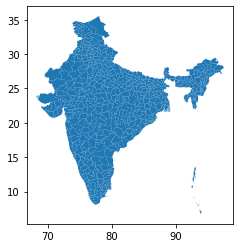

In [14]:
adm2.plot()

## Section 7 : Merge Datasets

In [15]:
df_merge_1_2 =  nfhs_df_subset.merge(health_infra_df_subset, on='pc11_district_id')
df_merge_1_2

,pc11_district_id,pc11_state_id,richest,poorest,no_toilet,primary_health_centers,pc11_state_name
0,001,1,8.311805,8.311969,0.826517,0.344717,Jammu & Kashmir
1,002,1,13.833916,1.934850,0.509206,0.696582,Jammu & Kashmir
2,003,1,6.757979,3.378412,1.690710,1.053564,Jammu & Kashmir
3,004,1,3.752654,18.584255,0.834409,1.065417,Jammu & Kashmir
4,005,1,16.886778,11.014970,38.312347,0.668528,Jammu & Kashmir
...,...,...,...,...,...,...,...
635,636,34,60.228069,0.127000,0.767188,0.448432,Puducherry
636,637,34,32.230705,6.298126,29.341400,0.468271,Puducherry
637,638,35,6.601454,0.742095,5.327342,1.272434,Andaman & Nicobar Island
638,639,35,11.717015,13.601043,38.738136,0.621520,Andaman & Nicobar Island


In [16]:
df_merge_3 = df_merge_1_2.merge(pollution_df, on='pc11_district_id')
df_merge_3 = df_merge_3.rename(columns={"pc11_state_id_x": "pc11_state_id"})
df_merge_3

,pc11_district_id,pc11_state_id,richest,poorest,no_toilet,primary_health_centers,pc11_state_name_x,pc11_state_id_y,pc11_state_name_y,mean_pollution
0,001,1,8.311805,8.311969,0.826517,0.344717,Jammu & Kashmir,1,Jammu & Kashmir,29.339097
1,002,1,13.833916,1.934850,0.509206,0.696582,Jammu & Kashmir,1,Jammu & Kashmir,38.904636
2,003,1,6.757979,3.378412,1.690710,1.053564,Jammu & Kashmir,1,Jammu & Kashmir,3.993170
3,004,1,3.752654,18.584255,0.834409,1.065417,Jammu & Kashmir,1,Jammu & Kashmir,8.861835
4,005,1,16.886778,11.014970,38.312347,0.668528,Jammu & Kashmir,1,Jammu & Kashmir,35.535978
...,...,...,...,...,...,...,...,...,...,...
635,636,34,60.228069,0.127000,0.767188,0.448432,Puducherry,34,Puducherry,22.700000
636,637,34,32.230705,6.298126,29.341400,0.468271,Puducherry,34,Puducherry,24.778195
637,638,35,6.601454,0.742095,5.327342,1.272434,Andaman & Nicobar Island,35,Andaman & Nicobar Island,4.545310
638,639,35,11.717015,13.601043,38.738136,0.621520,Andaman & Nicobar Island,35,Andaman & Nicobar Island,11.607143


In [17]:
# df_merge_4 = df_merge_3.merge(state_cases_df, on='pc11_state_id')
state_cases_df.pc11_state_id = (state_cases_df.pc11_state_id).astype('int64')

df_merge_4 = pd.merge(df_merge_3, state_cases_df, on=["pc11_state_id"],how='outer')

In [20]:
df_merge_4 = df_merge_4.rename(columns={"pc11_state_name_x": "pc11_state_name"})

df_merge_4

,pc11_district_id,pc11_state_id,richest,poorest,no_toilet,primary_health_centers,pc11_state_name,pc11_state_id_y,pc11_state_name_y,mean_pollution,total_cases,total_deaths
0,001,1,8.311805,8.311969,0.826517,0.344717,Jammu & Kashmir,1,Jammu & Kashmir,29.339097,21247.0,371.0
1,002,1,13.833916,1.934850,0.509206,0.696582,Jammu & Kashmir,1,Jammu & Kashmir,38.904636,21247.0,371.0
2,003,1,6.757979,3.378412,1.690710,1.053564,Jammu & Kashmir,1,Jammu & Kashmir,3.993170,21247.0,371.0
3,004,1,3.752654,18.584255,0.834409,1.065417,Jammu & Kashmir,1,Jammu & Kashmir,8.861835,21247.0,371.0
4,005,1,16.886778,11.014970,38.312347,0.668528,Jammu & Kashmir,1,Jammu & Kashmir,35.535978,21247.0,371.0
...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,34,60.228069,0.127000,0.767188,0.448432,Puducherry,34,Puducherry,22.700000,3298.0,48.0
636,637,34,32.230705,6.298126,29.341400,0.468271,Puducherry,34,Puducherry,24.778195,3298.0,48.0
637,638,35,6.601454,0.742095,5.327342,1.272434,Andaman & Nicobar Island,35,Andaman & Nicobar Island,4.545310,0.0,0.0
638,639,35,11.717015,13.601043,38.738136,0.621520,Andaman & Nicobar Island,35,Andaman & Nicobar Island,11.607143,0.0,0.0


In [21]:
adm2.rename(columns={'NAME_1':'pc11_state_name'}, inplace=True)
# adm2.pc11_state_id = (adm2.pc11_state_id).astype('int64')
# df_merge_4 = pd.merge(adm2, df_merge_4, on=["pc11_state_name"],how='outer')

df_merge_all = adm2.merge(df_merge_4, on='pc11_state_name')

In [24]:
df_merge_all.head()

,pc11_state_name,geometry,pc11_district_id,pc11_state_id,richest,poorest,no_toilet,primary_health_centers,pc11_state_id_y,pc11_state_name_y,mean_pollution,total_cases,total_deaths
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",638,35,6.601454,0.742095,5.327342,1.272434,35,Andaman & Nicobar Island,4.545310,0.0,0.0
1,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",639,35,11.717015,13.601043,38.738136,0.621520,35,Andaman & Nicobar Island,11.607143,0.0,0.0
2,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",640,35,40.113182,1.577588,6.207858,0.511818,35,Andaman & Nicobar Island,9.704774,0.0,0.0
3,Andaman & Nicobar Island,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2...",638,35,6.601454,0.742095,5.327342,1.272434,35,Andaman & Nicobar Island,4.545310,0.0,0.0
4,Andaman & Nicobar Island,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2...",639,35,11.717015,13.601043,38.738136,0.621520,35,Andaman & Nicobar Island,11.607143,0.0,0.0


In [26]:
#Dropping redundant columns
df_merge_all = df_merge_all.drop(['pc11_state_id_y','pc11_state_name_y'],axis=1)

In [27]:
df_merge_all

,pc11_state_name,geometry,pc11_district_id,pc11_state_id,richest,poorest,no_toilet,primary_health_centers,mean_pollution,total_cases,total_deaths
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",638,35,6.601454,0.742095,5.327342,1.272434,4.545310,0.0,0.0
1,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",639,35,11.717015,13.601043,38.738136,0.621520,11.607143,0.0,0.0
2,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",640,35,40.113182,1.577588,6.207858,0.511818,9.704774,0.0,0.0
3,Andaman & Nicobar Island,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2...",638,35,6.601454,0.742095,5.327342,1.272434,4.545310,0.0,0.0
4,Andaman & Nicobar Island,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2...",639,35,11.717015,13.601043,38.738136,0.621520,11.607143,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18576,West Bengal,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",341,19,16.125593,9.175496,9.685843,0.083125,44.827187,67626.0,1533.0
18577,West Bengal,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",342,19,32.101322,0.340575,0.056351,0.002085,45.576250,67626.0,1533.0
18578,West Bengal,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",343,19,5.981577,32.069283,17.931454,0.066626,40.519247,67626.0,1533.0
18579,West Bengal,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",344,19,4.298949,34.705917,43.233547,0.133182,47.756924,67626.0,1533.0


In [29]:
df_merge_all.set_index('pc11_district_id')

,pc11_state_name,geometry,pc11_state_id,richest,poorest,no_toilet,primary_health_centers,mean_pollution,total_cases,total_deaths
pc11_district_id,,,,,,,,,,
638,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",35,6.601454,0.742095,5.327342,1.272434,4.545310,0.0,0.0
639,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",35,11.717015,13.601043,38.738136,0.621520,11.607143,0.0,0.0
640,Andaman & Nicobar Island,"MULTIPOLYGON (((93.64841 14.93487, 93.64917 14...",35,40.113182,1.577588,6.207858,0.511818,9.704774,0.0,0.0
638,Andaman & Nicobar Island,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2...",35,6.601454,0.742095,5.327342,1.272434,4.545310,0.0,0.0
639,Andaman & Nicobar Island,"MULTIPOLYGON (((92.78778 9.24417, 92.78889 9.2...",35,11.717015,13.601043,38.738136,0.621520,11.607143,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
341,West Bengal,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",19,16.125593,9.175496,9.685843,0.083125,44.827187,67626.0,1533.0
342,West Bengal,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",19,32.101322,0.340575,0.056351,0.002085,45.576250,67626.0,1533.0
343,West Bengal,"POLYGON ((87.42143 22.92110, 87.44063 22.91789...",19,5.981577,32.069283,17.931454,0.066626,40.519247,67626.0,1533.0


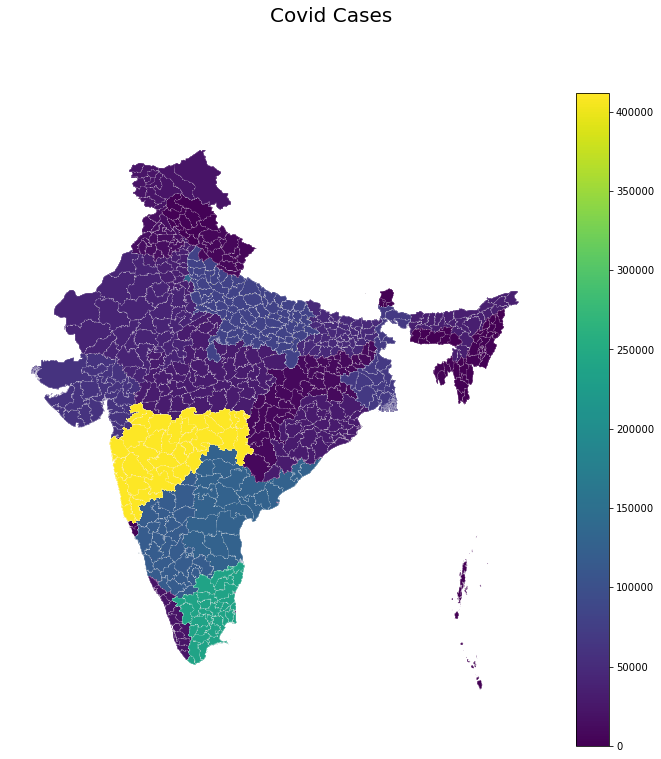

In [35]:
f, ax = plt.subplots(1, figsize=(12, 12))
df_merge_all.plot(column='total_cases',cmap='viridis', alpha=1, edgecolor='w', linewidth=0.1, ax = ax, legend=True)
ax.set_axis_off()
f.suptitle('Covid Cases', size=20)
plt.show()